# Lab2: Control, Descriptive Statistics and Visualization

#### Today's lab

In today's lab, you'll learn how to:

1. write functions and use flow control,
2. use the seaborn data visualization library and you'll learn about the following statistical ideas, which fall under _descriptive statistics_:
3. mean and variance
4. skewness and kurtosis
5.  medians, percentiles, and ranges

This lab covers parts of [Chapter 3](http://www.inferentialthinking.com/chapters/03/programming-in-python.html) of the online textbook. You should read the book, but not right now. Instead, let's get started!

In [1]:
# Importing standard data science libraries
import numpy as np
import pandas as pd

# 1. Functions and Control
Maybe talk about stuff here?

**Question 1.1.1.** Define the function `leapYear` such that it takes in a `year` and outputs `True` if `year` is a leap year and `False` if otherwise. There is a leap year every year whose number is perfectly divisible by four - except for years which are both divisible by 100 and not divisible by 400. The second part of the rule effects century years. For example; the century years 1600 and 2000 are leap years, but the century years 1700, 1800, and 1900 are not. This means that three times out of every four hundred years there are eight years between leap years.

In [2]:
def leapYear(year):
    """Return True if year is a leapYear
    >>> primeNumber(2014)
    False
    >>> primeNumber(2000)
    True
    >>> primeNumber(1700)
    False
    """
    if not year % 4:
        if not year % 100:
            return False if year % 400 else True
        return True
    return False
# raise NotImplementedError()

In [3]:
assert leapYear(2014) == False
assert leapYear(2000) == True
assert leapYear(1700) == False

**Question 1.1.2.** Define the function `primeNumber` that determines whether a number is a prime or not. A prime number is a natural number greater than 1 that cannot be formed by multiplying two smaller natural numbers.

In [4]:
def primeNumber(n):
    """Return True if n is a prime number
    >>> primeNumber(1)
    True
    >>> primeNumber(2)
    True
    >>> primeNumber(4)
    False
    """
    if n > 1:
        for i in np.arange(2, n**(1/2) + 1):
            if n % i == 0 and n != i:
                return False
        return True
    return False
# raise NotImplementedError()

In [5]:
assert primeNumber(1) == False
assert primeNumber(2) == True
assert primeNumber(4) == False
assert primeNumber(113) == True

**Question 1.1.3.** Define the function `doubleZero` that determines whether an array of numbers contains two consecutive zeroes.

In [6]:
def doubleZero(array):
    """Return True if array has two consecutive zeroes
    >>> doubleZero([0,0])
    True
    >>> doubleZero([1,0])
    False
    """
    previous = 1
    for i in array:
        if i == previous and i == 0:
            return True
        previous = i
    return False
# raise NotImplementedError()

In [7]:
assert doubleZero(np.array([1,0,0])) == True

# 2. Fun with Arrays and Descriptive Statistics
Maybe talk about stuff here?

## 2.1. Fun With the Mean
$$ \mu_x = \frac{1}{n} \sum_{i=1}^n x_i $$

**Question 2.1.1.** Define the function `ourSum` that takes in an `np.array` and finds the sum of its values.

In [8]:
def ourSum(array):
    count = 0
    for value in array:
        count += value
    return count
# raise NotImplementedError()

In [9]:
assert ourSum(np.arange(10)) == sum(np.arange(10))

**Question 2.1.2.** Define the function `ourLen` that takes in an `np.array` and finds the length of the array.

In [10]:
def ourLen(array):
    length = 0
    for value in array:
        length += 1
    return length
# raise NotImplementedError()

In [11]:
assert ourLen(np.arange(10)) == len(np.arange(10))

**Question 2.1.3.** Define the function `ourMean` that takes in an `np.array` and finds the mean of its values. You should be using `ourSum` and `ourLen` when writing this function.

In [12]:
def ourMean(array):
    return ourSum(array)/ourLen(array)
# raise NotImplementedError()

In [13]:
assert ourMean(np.arange(10)) == np.mean(np.arange(10))

**Question 2.1.4.** Show that the the mean in a list of 1's and 0's is the proportion of 1's in the list

$$ \mu_x = \frac{1}{n} \sum_{i=1}^n x_i $$
$$ = \frac{1}{n} \left(\sum_{i=1}^{n_1} 1 +  \sum_{i=1}^{n_0} 0\right) $$
$$ = \frac{1}{n} \sum_{i=1}^{n_1} 1$$
$$ = \frac{n_1}{n} $$

**Question 2.1.5.** There are two group of sprinters. Group A has 8 sprinters and an average 100m dash time of 13.2s. Group B has 12 sprinters and an average 100m dash time of 14.1s. If the two groups were combined together, what would be their average 100m dash time?

$$ n_z = n_a + n_b $$
$$ \mu_z = \frac{1}{n_z} \sum_{i=1}^n z_i $$
$$ = \frac{1}{n}\left( \sum_{i=1}^{n_a} a_i + \sum_{i=1}^{n_b} b_i \right)$$
$$ = \frac{1}{n}\left( \mu_a n_a + \mu_b n_b \right) $$
$$ = \frac{\mu_a n_a + \mu_b n_b}{n} $$

In [14]:
combinedAverage = (8*13.2+12*14.1)/20

In [15]:
assert combinedAverage > 13.73 and combinedAverage < 13.74

**Question 2.1.6.** Suppose you are in a class with the following grading scheme:

* 70% of the grade comes evenly from two exams: a midterm and a final
* 20% comes from homework
* 10% comes from quizzes

Write the function `rogerHub` that returns the minimum score on the final to achieve a user inputted overall grade, given midterm, homework, and quizz grades.

In [16]:
def rogerHub(midterm, homework, quizzes, grade):
    return (grade - (midterm*35/100 + homework*20/100 + quizzes*10/100))*100/35
# raise NotImplementedError()

In [17]:
assert rogerHub(90, 90, 90, 80) > 61.4 and rogerHub(90, 90, 90, 80) < 62

## 2.2. Array Slicing

In [18]:
exampleArray = np.arange(10)

# The list.
print(exampleArray)

# Indexing (first item in list).
print(exampleArray[0])

# Indexing backwards (first item from the end).
print(exampleArray[-1])

# Slicing from item 1 (inclusive) to item 5 (exclusive).
print(exampleArray[1:5])

# Slicing from the item.
print(exampleArray[1:])

# Slicing up to the third to last item.
print(exampleArray[:-3])

# Selecting every other item from a previous slice.
print(exampleArray[1:5:2])

# The list backwards.
print(exampleArray[::-1])

[0 1 2 3 4 5 6 7 8 9]
0
9
[1 2 3 4]
[1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6]
[1 3]
[9 8 7 6 5 4 3 2 1 0]


In [19]:
callable(exampleArray)
# try:
#     exampleArray[1.0]
# except IndexError:
#     print("IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices")

False

**Question 2.2.1.** Define the function `ourRange` that takes in an `np.array` and returns a tuple that contains the min and max values of the array.

In [20]:
def ourRange(array):
    sortedArray = np.sort(array)
    minValue, maxValue = sortedArray[0], sortedArray[-1]
    return (minValue, maxValue)
# raise NotImplementedError()

In [21]:
assert ourRange(np.arange(10)) == (0, 9)

**Question 2.2.2.** Define the function `ourMedian` that takes in an `np.array` and finds the median of its values. If there is an even number of values in the array, return the average of the two middle values (Hint: use the function `np.sort` and `int` or the double division operator `//`).

In [22]:
def ourMedian(array):
    # designed in part to teach debugging
    length = ourLen(array)
    if length % 2 == 0:
        return ourMean(np.sort(array)[length//2-1:length//2+1])
    return np.sort(array)[(ourLen(array)-1)//2]
# raise NotImplementedError()

In [23]:
assert ourMedian(np.arange(10)) == np.median(np.arange(10))
assert ourMedian(np.arange(11)) == np.median(np.arange(11))

**Question 2.2.3.** Define the function `ourPercentile` that takes in an `np.array` to find the value of the `i`th percentile of the array (Hint: use the function `round`).

In [24]:
def ourPercentile(array, i):
    return np.sort(array)[round(i/100*(ourLen(array)-1))]
# raise NotImplementedError()

In [25]:
assert ourPercentile(np.arange(101), 50) == np.percentile(np.arange(101), 50)

**Question 2.2.4.** Find the IQR of `someArray` using `ourPercentile`. 
$$ IQR = Q_3 - Q_1 $$

In [26]:
someArray = np.arange(0,101)
IQR = ourPercentile(someArray, 75) - ourPercentile(someArray, 25)
# raise NotImplementedError()

In [27]:
assert IQR == 50

## 2.3. Variance

**Question 2.3.1.** Derive the computational form of variance:
$$ \sigma^2 = \frac{1}{n}\sum_{i=1}^n \left(x_i - \mu\right)^2 = \frac{1}{n}\sum_{i=1}^n x_i^2 - \mu^2 $$

**Question 2.3.2.** Write the function `ourVariance` that returns the variance of an array using the computational formula of variance.

In [28]:
def ourVariance(array):
    return ourMean(array**2) - ourMean(array)**2
# raise NotImplementedError()

In [29]:
assert ourVariance(np.arange(10)) == np.var(np.arange(10))

**Question 2.3.3.** There are two group of sprinters. Group A has 8 sprinters and an average 100m dash time of 13.2s and a variance of 1.5. Group B has 12 sprinters and an average 100m dash time of 14.1s and a variance of 1.8. If the two groups were combined together, what would be the variance of their 100m dash time?

## 2.4. Skewness

## 2.5. Kurtosis 

# 3. Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[guide](https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 3.1 Histograms

We will visualize the Survival from Malignant Melanoma dataset. The `melanoma` DataFrame has 205 rows and 7 columns. The data consist of measurements made on patients with malignant melanoma. Each patient had their tumour removed by surgery at the Department of Plastic Surgery, University Hospital of Odense, Denmark during the period 1962 to 1977. The surgery consisted of complete removal of the tumour together with about 2.5cm of the surrounding skin. Among the measurements taken were the thickness of the tumour and whether it was ulcerated or not. These are thought to be important prognostic variables in that patients with a thick and/or ulcerated tumour have an increased chance of death from melanoma. Patients were followed until the end of 1977.


**Format**

This data frame contains the following columns:

* time- Survival time in days since the operation, possibly censored.

* status- The patients status at the end of the study. 1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3 indicates that they had died from causes unrelated to their melanoma.

* sex- The patients sex; 1=male, 0=female.

* age- Age in years at the time of the operation.

* year- Year of operation.

* thickness- Tumour thickness in mm.

* ulcer- Indicator of ulceration; 1=present, 0=absent.

**Source**

The data were obtained from:

Andersen, P.K., Borgan, O., Gill, R.D. and Keiding, N. (1993) Statistical Models Based on Counting Processes. Springer-Verlag.

References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

Venables, W.N. and Ripley, B.D. (1994) Modern Applied Statistics with S-Plus. Springer-Verlag.


In [31]:
# Loading the dataset.
melanoma = pd.read_csv('data/melanoma.csv', index_col= 'index')

# Displaying the first 5 rows
melanoma.head()

,time,status,sex,age,year,thickness,ulcer
index,,,,,,,
1,10,3,1,76,1972,6.76,1
2,30,3,1,56,1968,0.65,0
3,35,2,1,41,1977,1.34,0
4,99,3,0,71,1968,2.90,0
5,185,1,1,52,1965,12.08,1


In [32]:
# Cleaning the dataset.
melanoma = melanoma.replace({
    'status' : {
        1 : 'melanoma death',
        2 :'alive',
        3 :'unrelated death'
    },
    'sex' : {
        1 : 'M',
        0 : 'F'
    },
    'ulcer' : {
        1 : 'present',
        0 : 'absent'
    }
})

#Displaying the first 5 rows
melanoma.head()

,time,status,sex,age,year,thickness,ulcer
index,,,,,,,
1,10,unrelated death,M,76,1972,6.76,present
2,30,unrelated death,M,56,1968,0.65,absent
3,35,alive,M,41,1977,1.34,absent
4,99,unrelated death,F,71,1968,2.90,absent
5,185,melanoma death,M,52,1965,12.08,present


`df.describe()` will give you all of the descriptive statistics. Notice that the columns with non-numeric column values are excluded.

In [33]:
melanoma.describe()

,time,age,year,thickness
count,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,52.463415,1969.907317,2.919854
std,1122.060667,16.671711,2.575563,2.959433
min,10.000000,4.000000,1962.000000,0.100000
25%,1525.000000,42.000000,1968.000000,0.970000
50%,2005.000000,54.000000,1970.000000,1.940000
75%,3042.000000,65.000000,1972.000000,3.560000
max,5565.000000,95.000000,1977.000000,17.420000


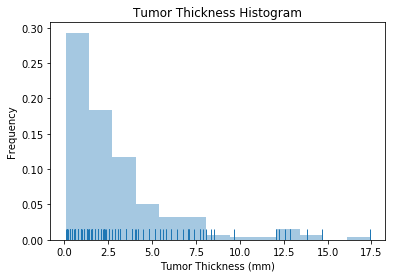

In [34]:
# Plotting exercise distribution
sns.distplot(
    melanoma['thickness'],
    bins = 13,
    rug = True,
    kde = False,
    norm_hist = True)
plt.title('Tumor Thickness Histogram')
plt.xlabel('Tumor Thickness (mm)')
plt.ylabel('Frequency')
plt.show()

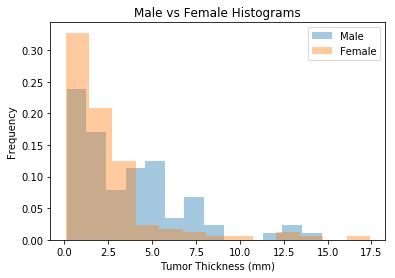

In [35]:
sns.distplot(
    melanoma[melanoma['sex'] == 'M']['thickness'],
    bins = 13,
    kde = False,
    norm_hist = True)
sns.distplot(
    melanoma[melanoma['sex'] == 'F']['thickness'],
    bins = 13,
    kde = False,
    norm_hist = True)
plt.title('Male vs Female Histograms')
plt.xlabel('Tumor Thickness (mm)')
plt.ylabel('Frequency')
plt.legend(('Male', 'Female'))
plt.show()

## 3.2 Box Plots

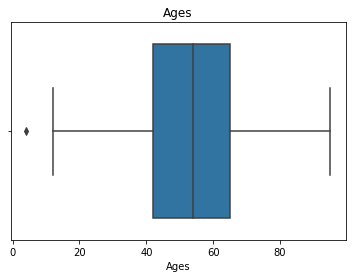

In [36]:
# Plotting Box Plot
sns.boxplot(melanoma['age']) 
plt.title('Ages')
plt.xlabel('Ages')
plt.show()

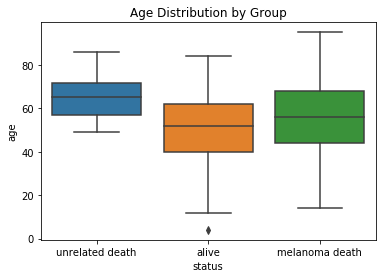

In [37]:
# Vertical Boxplots Comparing Different Distributions
sns.boxplot(
    x = 'status',
    y ='age',
    data = melanoma)
plt.title('Age Distribution by Group')
plt.show()

## 3.3 Violin Plots

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


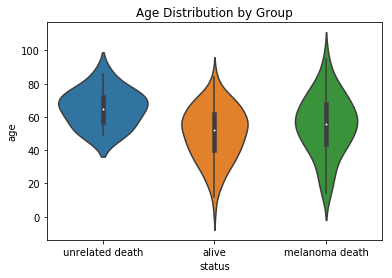

In [38]:
# Violin Plots Comparing Different Distributions
sns.violinplot(
    x = 'status', 
    y = 'age',
    data = melanoma)
plt.title('Age Distribution by Group')
plt.show()